In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [18]:
def find_eye_center(img): 

    img_copy = img.copy()
    mean = img_copy.mean()
    stddev = img_copy.std()

    mask = img_copy < (mean - 1 * stddev)
    img_copy[mask] = 0

    ys, xs = np.where(img_copy == 0)

    if len(xs) > 0:
        leftmost_zero = xs.min()
        rightmost_zero = xs.max()

        y_left = ys[xs == leftmost_zero]
        y_right = ys[xs == rightmost_zero]

        top_y = min(y_left.min(), y_right.min())
        bottom_y = max(y_left.max(), y_right.max())
        vertical_mid = (top_y + bottom_y) // 2

        eye_center = ((leftmost_zero + rightmost_zero) // 2, vertical_mid)
        return eye_center
    else: 
        return None


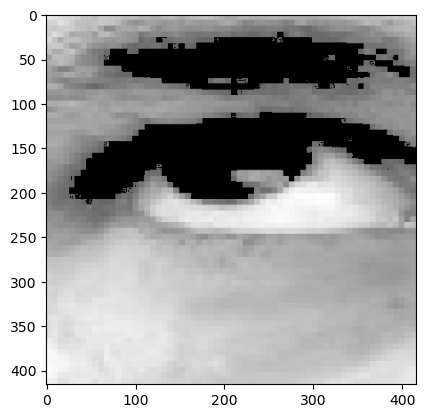

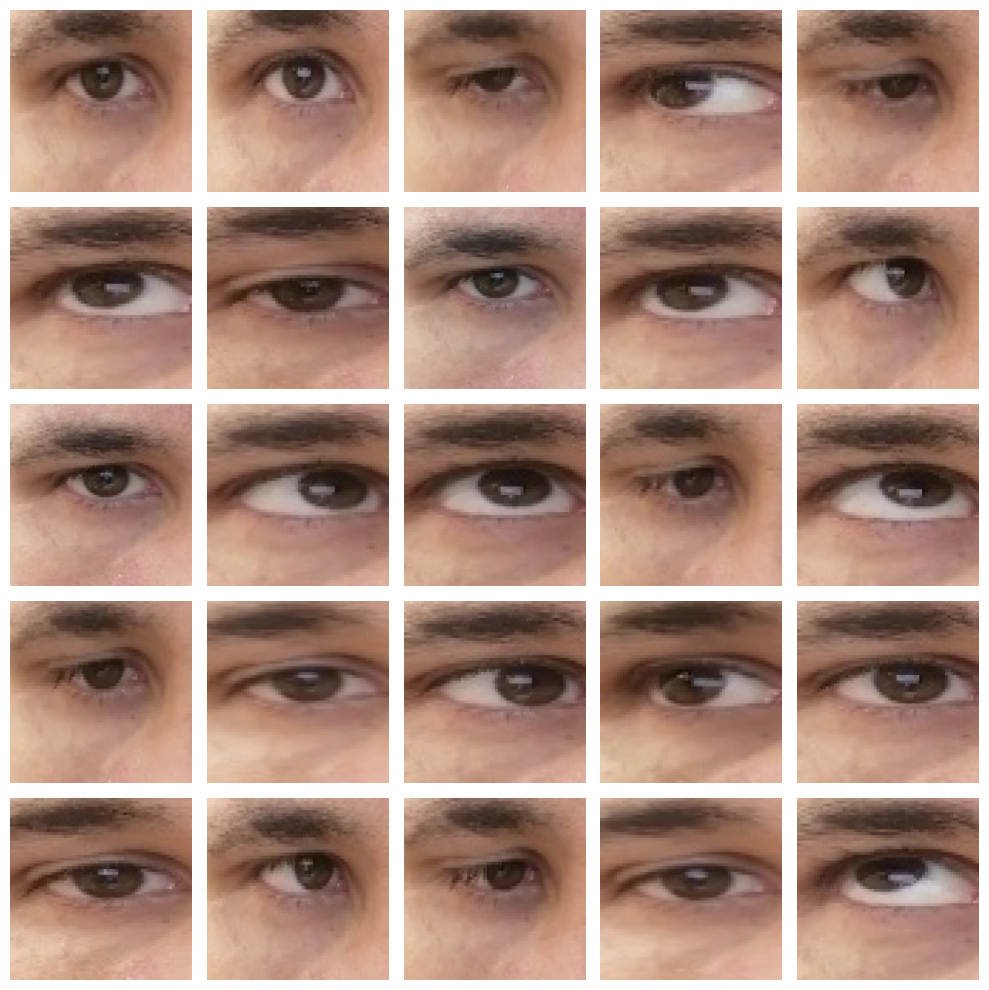

x_centroid: []
y_centroid: []


In [ ]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
import os

x_centroid_d2 = []
y_centroid_d2 = []

folder_path = "eye_dataset"
image_files = glob.glob(os.path.join(folder_path, "*.jpg"))

images = []
for file in image_files:
    img = cv2.imread(file)
    if img is not None:
        images.append(img)

for img in images:
   imrgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
   gray = cv2.cvtColor(imrgb, cv2.COLOR_RGB2GRAY)
   img_copy = gray.copy()
   mean = img_copy.mean()
   stddev = img_copy.std()

   mask = img_copy < (mean - 1 * stddev)
   img_copy[mask] = 0

   plt.imshow(img_copy, cmap='gray')


plt.figure(figsize=(10, 10)) 
for i in range(min(len(images), 25)):
    img_rgb = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.subplot(5, 5, i+1)
    plt.imshow(img_rgb)
    plt.axis('off')

plt.tight_layout()
plt.show()

print("x_centroid:", x_centroid_d2)
print("y_centroid:", y_centroid_d2)


